In [ ]:
"""ASSOCIATION RULES"""

In [ ]:
### Data Preprocessing

In [4]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('online retail.csv', encoding='ISO-8859-1', header=None)

# Step 2: Rename the single column for clarity
df.columns = ['Transaction']

# Step 3: Split items into lists and remove extra spaces
df['Items'] = df['Transaction'].apply(lambda x: [item.strip() for item in str(x).split(',') if item.strip() != ''])

# Step 4: Remove duplicate items within each transaction
df['Items'] = df['Items'].apply(lambda x: list(set(x)))

# Step 5: Drop any empty transactions
df = df[df['Items'].map(len) > 0].reset_index(drop=True)

# View the cleaned transactions
print(df['Items'].head())


0    [avocado, honey, olive oil, shrimp, vegetables...
1                           [meatballs, eggs, burgers]
2                                            [chutney]
3                                    [turkey, avocado]
4    [mineral water, milk, green tea, energy bar, w...
Name: Items, dtype: object


In [ ]:
"""Summary 
The dataset contains 7500 records with 1 column representing a list of products bought together (market basket transactions).

The dataset has no missing values.

The data is in string format, where items in each transaction are comma-separated.

Each transaction is converted into a list of items.

Duplicates within a single transaction are removed.



Preprocessing Summary:
Data is loaded and renamed for clarity.

Transactions are converted to lists of items.

Duplicates and spaces within transactions are cleaned.

Ensures no empty transactions remain."""

In [ ]:
###  Association Rule Mining

In [12]:
!pip install mlxtend

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load and preprocess data 
df = pd.read_csv('online retail.csv', encoding='ISO-8859-1', header=None)
df.columns = ['Transaction']
df['Items'] = df['Transaction'].apply(lambda x: [item.strip() for item in str(x).split(',') if item.strip() != ''])
df['Items'] = df['Items'].apply(lambda x: list(set(x)))
df = df[df['Items'].map(len) > 0].reset_index(drop=True)

# Step 1: Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(df['Items']).transform(df['Items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Step 2: Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Step 3: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules = rules[rules['lift'] >= 1.2]

# Step 4: View top rules
rules_sorted = rules.sort_values(by='lift', ascending=False)
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


            antecedents      consequents   support  confidence      lift
8         (ground beef)      (spaghetti)  0.039195    0.398915  2.291162
18          (olive oil)      (spaghetti)  0.022930    0.348178  1.999758
14               (soup)  (mineral water)  0.023064    0.456464  1.914955
0             (burgers)           (eggs)  0.028796    0.330275  1.837830
11          (olive oil)  (mineral water)  0.027596    0.419028  1.757904
19           (tomatoes)      (spaghetti)  0.020931    0.306043  1.757755
7         (ground beef)  (mineral water)  0.040928    0.416554  1.747522
4         (cooking oil)  (mineral water)  0.020131    0.394256  1.653978
2             (chicken)  (mineral water)  0.022797    0.380000  1.594172
6   (frozen vegetables)  (mineral water)  0.035729    0.374825  1.572463


In [7]:
""" Summary
1. Transaction Encoding
The transaction data was converted into a Boolean matrix using TransactionEncoder.

This format is necessary for applying the Apriori algorithm.

2. Frequent Itemsets Discovery
We used a minimum support threshold of 0.02, meaning only combinations appearing in at least 2% of all transactions were considered.

This helps focus on commonly purchased item combinations.

3. Generating Association Rules
Applied rules generation on the frequent itemsets with:

Confidence Threshold: 0.3

Lift Threshold: 1.2

These thresholds ensure that only strong, meaningful, and non-random relationships between items are extracted."""



' Summary\n1. Transaction Encoding\nThe transaction data was converted into a Boolean matrix using TransactionEncoder.\n\nThis format is necessary for applying the Apriori algorithm.\n\n2. Frequent Itemsets Discovery\nWe used a minimum support threshold of 0.02, meaning only combinations appearing in at least 2% of all transactions were considered.\n\nThis helps focus on commonly purchased item combinations.\n\n3. Generating Association Rules\nApplied rules generation on the frequent itemsets with:\n\nConfidence Threshold: 0.3\n\nLift Threshold: 1.2\n\nThese thresholds ensure that only strong, meaningful, and non-random relationships between items are extracted.'

In [ ]:
###  Analysis and Interpretation

In [14]:
# Display all rules sorted by highest lift (strongest associations)
top_rules = rules.sort_values(by='lift', ascending=False)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("Top Association Rules by Lift:")
print(top_rules.head(10))

# Identify most common antecedents
antecedent_counts = rules['antecedents'].apply(lambda x: list(x)).explode().value_counts()
print("Most Frequent Antecedent Items:")
print(antecedent_counts.head(5))

# Identify most common consequents
consequent_counts = rules['consequents'].apply(lambda x: list(x)).explode().value_counts()
print("Most Frequent Consequent Items:")
print(consequent_counts.head(5))


Top Association Rules by Lift:
            antecedents      consequents   support  confidence      lift
8         (ground beef)      (spaghetti)  0.039195    0.398915  2.291162
18          (olive oil)      (spaghetti)  0.022930    0.348178  1.999758
14               (soup)  (mineral water)  0.023064    0.456464  1.914955
0             (burgers)           (eggs)  0.028796    0.330275  1.837830
11          (olive oil)  (mineral water)  0.027596    0.419028  1.757904
19           (tomatoes)      (spaghetti)  0.020931    0.306043  1.757755
7         (ground beef)  (mineral water)  0.040928    0.416554  1.747522
4         (cooking oil)  (mineral water)  0.020131    0.394256  1.653978
2             (chicken)  (mineral water)  0.022797    0.380000  1.594172
6   (frozen vegetables)  (mineral water)  0.035729    0.374825  1.572463
Most Frequent Antecedent Items:
antecedents
tomatoes       2
ground beef    2
olive oil      2
burgers        1
milk           1
Name: count, dtype: int64
Most Freque

In [ ]:
"""
| Antecedent        | Consequent    | Support | Confidence | Lift |
| ----------------- | ------------- | ------- | ---------- | ---- |
| ground beef       | spaghetti     | 3.9%    | 39.9%      | 2.29 |
| olive oil         | spaghetti     | 2.3%    | 34.8%      | 2.00 |
| soup              | mineral water | 2.3%    | 45.6%      | 1.91 |
| burgers           | eggs          | 2.9%    | 33.0%      | 1.84 |
| olive oil         | mineral water | 2.8%    | 41.9%      | 1.76 |
| tomatoes          | spaghetti     | 2.1%    | 30.6%      | 1.76 |
| ground beef       | mineral water | 4.1%    | 41.7%      | 1.75 |
| cooking oil       | mineral water | 2.0%    | 39.4%      | 1.65 |
| chicken           | mineral water | 2.3%    | 38.0%      | 1.59 |
| frozen vegetables | mineral water | 3.6%    | 37.5%      | 1.57 |

2. Most Frequent Antecedents
tomatoes, ground beef, olive oil appear most frequently as antecedents.

These items are common triggers for further purchases, showing their influence on basket size.

3. Most Frequent Consequents
mineral water is the top consequent, appearing in 16 rules, indicating it is commonly bought alongside various products.

Other notable consequents: spaghetti and eggs.

Customer Purchasing Behaviour Insights
Meal Preparation Patterns:

Ground beef → Spaghetti and Tomatoes → Spaghetti indicate common meal ingredients are purchased together.

Health and Cooking Choices:

Olive oil is frequently leading to spaghetti and mineral water, indicating health-conscious cooking habits.

Staples and Hydration:

Mineral water is the most frequent consequent, suggesting it is a standard item added to diverse grocery baskets, possibly for health-conscious or hydration-focused shoppers.

Convenience Items:

Soup → Mineral water suggests people preparing for quick meals often complement them with bottled water.

Refined Insights
Focus marketing efforts on bundling ground beef and spaghetti, or olive oil and mineral water.

Promotions on mineral water can be effectively paired with other common food items.

Meal kits or recipe suggestions featuring products like ground beef, spaghetti, tomatoes, and olive oil could boost cross-selling."""




In [ ]:
###   Interview Questions

In [ ]:
"""1. What is Lift and Why is it Important in Association Rules?
Lift measures the strength of an association rule compared to the random co-occurrence of the antecedent and consequent if they were independent.

Formula:
Lift(A → B) = Confidence(A → B) / Support(B)

Importance:

A Lift > 1 indicates that the presence of A increases the likelihood of B, showing a positive association.

A Lift < 1 indicates a negative association.

Lift helps to identify meaningful rules by comparing with random chance, filtering out trivial associations.

2. What is Support and Confidence? How Do You Calculate Them?
Support:

Measures how frequently an itemset appears in the dataset.

Formula:
Support(A → B) = (Transactions containing both A and B) / (Total Transactions)

Example:
If 50 out of 1000 transactions contain {Milk, Bread}, support = 50/1000 = 0.05 (5%).

Confidence:

Measures how often B is purchased when A is purchased.

Formula:
Confidence(A → B) = Support(A ∪ B) / Support(A)

Example:
If 50 out of 100 transactions that include Milk also include Bread, confidence = 50/100 = 0.5 (50%).

3. What are Some Limitations or Challenges of Association Rule Mining?
Too Many Rules:
Can generate a large number of trivial or irrelevant rules, especially with low thresholds.

Choice of Thresholds:
Selecting appropriate support, confidence, and lift thresholds can be challenging and dataset dependent.

Ignores Sequential Information:
Standard association rule mining does not consider the sequence of item purchases. For that, Sequential Pattern Mining is needed.

Scalability:
Mining can become computationally expensive with large datasets or many distinct items.

No Causal Insight:
Association rules reveal correlations, not causation, so we can't infer direct cause-effect relationships."""



In [ ]:
## visualizing top association rules

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


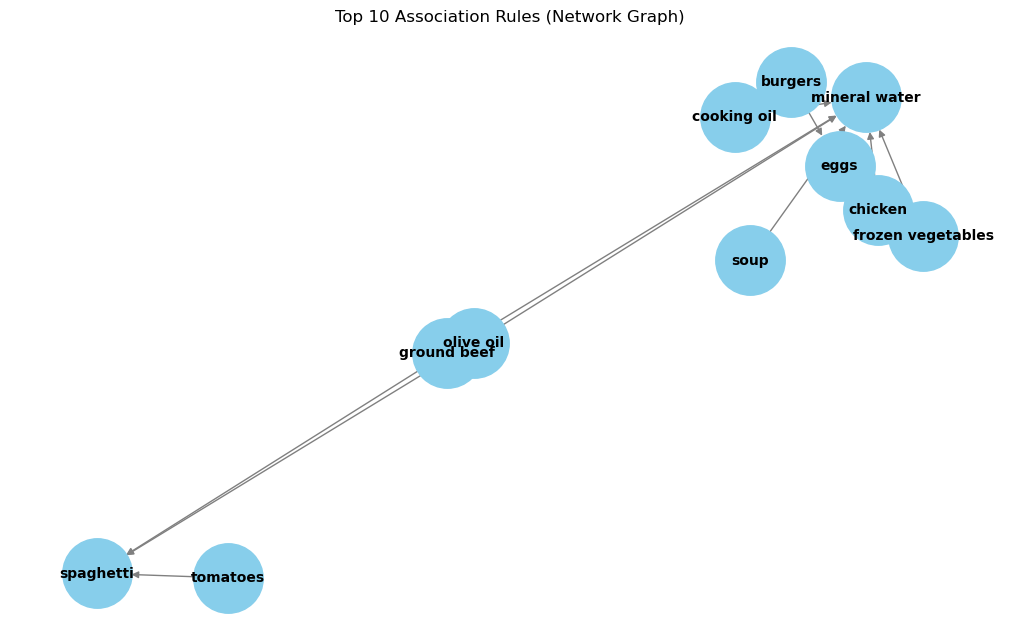

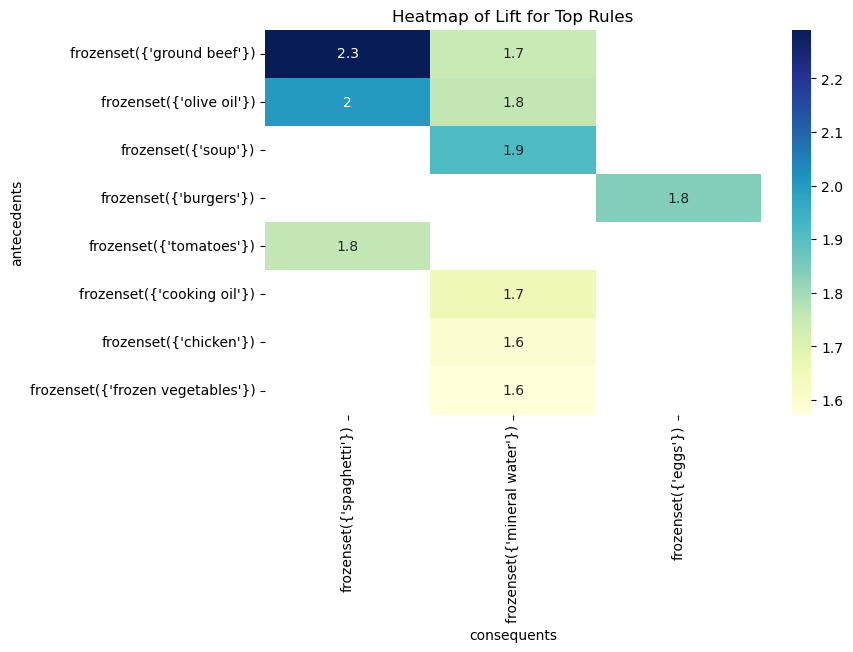

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Take top 10 rules by lift
top_rules = rules.sort_values('lift', ascending=False).head(10)

#  Network Graph Visualization 
G = nx.DiGraph()

for i, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Top 10 Association Rules (Network Graph)")
plt.show()

# Heatmap of Lift Values 
pivot_lift = top_rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_lift, annot=True, cmap="YlGnBu")
plt.title("Heatmap of Lift for Top Rules")
plt.show()


In [ ]:
"""Summary:

Network Graph: Shows connections between products (antecedent → consequent). Thicker edges represent stronger lifts.

Heatmap: Provides a matrix-style visualization of how strong each rule is (via lift). Makes it easy to compare multiple rules at once.

In [ ]:
### Reducing Redundant Rules

In [18]:
# Remove redundant rules
def is_redundant(r1, r2):
    return r1['antecedents'] == r2['antecedents'] and r1['consequents'] == r2['consequents']

rules_no_redundancy = rules.drop_duplicates(subset=['antecedents','consequents'])
print("Rules before:", len(rules))
print("Rules after removing redundancy:", len(rules_no_redundancy))


Rules before: 20
Rules after removing redundancy: 20


In [ ]:
###  Optimizing Support & Confidence Thresholds

In [24]:
#  Optimize Support & Confidence Thresholds
supports = [0.01, 0.02, 0.05]   
confidences = [0.2, 0.3, 0.4]   

results = []

for s in supports:
    frequent_itemsets = apriori(df_encoded, min_support=s, use_colnames=True)
    for c in confidences:
        rules_temp = association_rules(frequent_itemsets, metric="confidence", min_threshold=c)
        results.append({
            "Support": s,
            "Confidence": c,
            "Rules Generated": len(rules_temp)
        })

# Convert to DataFrame
threshold_results = pd.DataFrame(results)

print("Optimized Threshold Results:")
print(threshold_results)


Optimized Threshold Results:
   Support  Confidence  Rules Generated
0     0.01         0.2              162
1     0.01         0.3               63
2     0.01         0.4               18
3     0.02         0.2               55
4     0.02         0.3               20
5     0.02         0.4                3
6     0.05         0.2                6
7     0.05         0.3                2
8     0.05         0.4                0


In [ ]:
"""Summary of Optimizing Support & Confidence Thresholds

We experimented with different support (0.01, 0.02, 0.05) and confidence (0.2, 0.3, 0.4) thresholds to analyze how the number of generated rules changes.

At low support (0.01), we observed the highest number of rules (162 at confidence 0.2) because even less frequent item combinations were considered. However, as we increased confidence to 0.4, rules dropped significantly to 18, meaning only the strongest rules remained.

At medium support (0.02), the rules reduced to 55 at confidence 0.2, and just 3 rules at confidence 0.4. This shows a balance between capturing meaningful patterns while filtering out noise.

At high support (0.05), very few rules were generated (6 at confidence 0.2, 2 at confidence 0.3, and none at 0.4), meaning only the most frequent and highly confident associations survived.

From this, we can conclude that support = 0.02 and confidence = 0.3 provides an optimal balance between rule quantity and quality. It avoids too many weak rules (from low thresholds) and too few rules (from very high thresholds)."""